# t-SNE 매니폴드 학습


**매니폴드(manifold)란?**  

비선형적인 곡선도 국부적으로는 직선으로 근사할 수 있는 것처럼, 매니폴드 상의 임의의 점도 미소 구간에서는 유클리디안 공간(Euclidean metric, 직선 거리)으로 볼 수 있다.

매니폴드 학습(manifold learning) 알고리즘이라고 하는 알고리즘은 훨씬 복잡한 매핑 방법을 사용하여 더 나은 시각화를 제공한다. 특히 t-SNE 알고리즘을 많이 사용한다.

**t-SNE**

t-SNE는 t-Distributed Stochastic Neighbor Embedding의 약자이다.  

차원 축소를위한 비선형 기법으로, 특히 고차원 데이터 세트의 시각화에 적합하다. 주로 데이터 탐색을 위주로 사용된다. t-SNE의 아이디어는 데이터 포인트 사이의 거리를 가장 잘 보존하는 2차원 표현을 찾는 것이다. 

간단히 말하면, t-SNE (t-Distributed stochastic neighbor embedding)는 고차원의 분포와 차원 축소된 저차원 - 두 분포 사이의 차이를 최소화하는 방식으로 학습이 진행된다. 이러한 방식으로, t-SNE는 다차원 데이터를 낮은 차원 공간에 매핑하고 여러 특징을 갖는 데이터 포인트의 유사성에 기초하여 관찰된 클러스터를 식별함으로써 데이터에서 패턴을 찾는다.

먼저 t-SNE는 각 데이터 포인트를 2차원에 무작위로 표현한 후 원본 특성 공간에서 가까운 포인트는 가깝게, 멀리 떨어진 포인트는 멀어지게 만든다. 즉, 데이터 공간의 구조를 그대로 유지하도록 한다. t-SNE는 멀리 떨어진 포인트보다 가까이 있는 포인트에 더 많은 비중을 둔다. 이를 위해서 t-분포를 사용한다.

![tsne](./tsne.png)


In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

### PCA 와 t-SNE

손글씨 데이터를 PCA와 t-SNE로 각각 차원 축소하여 시각화 해 비교해 본다.

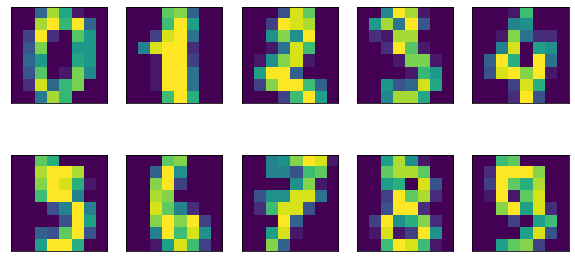

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

### PCA로 차원 축소 후 시각화

Text(0, 0.5, '2st PC')

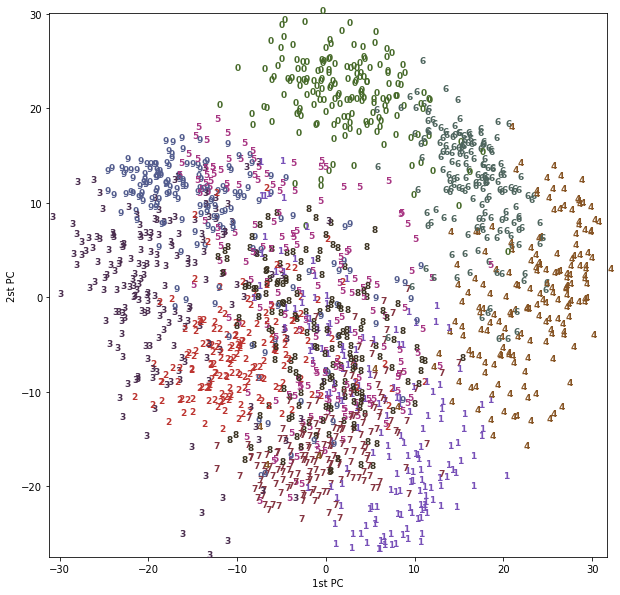

In [4]:
from sklearn.decomposition import PCA

# PCA 모델을 생성합니다
pca = PCA(n_components=2)
pca.fit(digits.data)
# 처음 두 개의 주성분으로 숫자 데이터를 변환합니다
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그립니다
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("1st PC")
plt.ylabel("2st PC")

2개 주성분만으로도 0,6,4 숫자는 잘 분리가 된다.

### t-SNE로 차원 축소하여 시각화

TSNE는 새 데이터를 변환하는 기능을 제공하지 않는다. 따라서 transform 메서드가 없고, 데이터를 변환해주는 fit_transform 메서드를 사용한다.

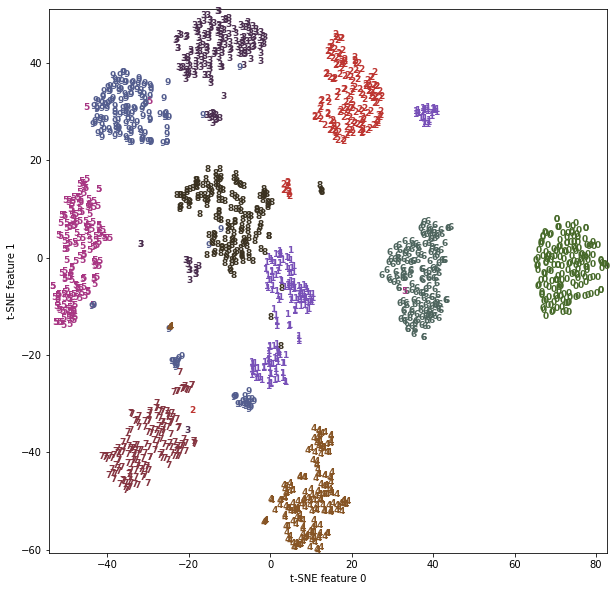

In [7]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=0)
# TSNE에는 transform 메소드가 없으므로 대신 fit_transform을 사용합니다
digits_tsne = tsne.fit_transform(digits.data)

plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그립니다
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")
plt.show()

1과 9를 제외하고는 거의 제대로 분류된 것을 확인할 수 있다. 원본 데이터 공간에서 포인트들이 얼마나 가까이 있는지에 대한 정보로 클래스가 잘 구분되는 2차원 표현을 찾았다. 

클래스 레이블 정보를 사용하지 않았으므로 비지도 학습이다.

### t-SNE의 주요 매개변수
* perplexity : perplexity: 값이 크면 더 많은 이웃을 포함하여 작은 그룹은 무시한다.
    * 기본값 = 30
    * 보통 5~50사이의 값을 가짐
* early_exaggeration : 원본 공간의 클러스터들이 얼마나 멀게 2차원에 나타낼지를 정함
    * 기본값은 4
    * 최소한 1보다 커야하고 값이 클수록 간격이 커짐


## PCA 대 t-SNE
PCA와 t-SNE 모두 고유 한 장단점이 있지만 PCA와 t-SNE의 주요 차이점은 다음과 같다.

* t-SNE는 계산 비용이 많이 들고 시간이 오래 걸릴 수 있다.
* t-SNE는 비선형 차원 감소 기법으로 시각화에 주로 사용된다. 
* PCA와 같은 선형 차원 감소 알고리즘으로 피처 간의 복잡한 다항식 관계를 해석 할 수 없지만 t-SNE는 비선형 매니폴드로 정확하게 표현할 수 있다. 
* t-SNE는 같은 데이터에 동일한 하이퍼 파라미터를 사용하더라도 다른 실행에서 다른 결과를 생성 할 수 있다.(다만 군집에 대한 특성은 그대로 유지 )
